In ex2, we're going to switch our objective from predicting a continous value(regression) to classifying a result in two or more discrete values(classification).

In [27]:
import pandas as pd
data = pd.read_csv('ex2data1.txt', header = None, names = ['Exam1', 'Exam2', 'Admitted'] )
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [28]:
# Adding a column of ones
data.insert(0, 'Ones', 1)
data.head()

,Ones,Exam1,Exam2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [29]:
# Dividing our dataset into X and y
X = data.iloc[:, 0:3]
y = data.iloc[:, 3:]

print(X.shape)
print(y.shape)

(100, 3)
(100, 1)


In [30]:
# Converting our dataframe into numpy arrays
X = X.values
y = y.values

print(X.shape)
print(y.shape)

(100, 3)
(100, 1)


Let's implement Logistic Regression to train the model to make class (0 or 1) predictions.

The first step is to ***implement sigmoid function*** . This function is the "activation function for the output of logistic regression" meaning 1 or 0, depending on the input or set of inputs. For continous input values, sigmoid function converts those inputs to a value between 0 and 1. ***This value is interpreted as the class probability, or the likelihood that the input example should be classified positively***.

In [9]:
import numpy as np

def sigmoid(z):
    x = 1 / (1 + np.exp(-z))
    return x

In [32]:
# Initializing m and theta
m = X.shape[0]
theta = np.zeros((3,1))

In [33]:
# Cost function
def compute_cost(theta, X, y):
    z = np.dot(X,theta.reshape(-1,1)) # We want h = (m,1)
    h = sigmoid(z)
    J = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J

In [34]:
initial_theta = np.zeros((X.shape[1]))
cost = compute_cost(initial_theta,X, y)
print('Cost = ' + str(cost))

Cost = 0.6931471805599453


Now that we have a working cost function, the next step is to write a ***function that computes the gradient of the model parameters to figure out how to change the parameters to improve the outcome of the model on the training data***. Recall that ***with gradient descent we don’t just randomly jigger around the parameter values and see what works best. At each training iteration we update the parameters in a way that’s guaranteed to move them in a direction that reduces the training error (i.e. the “cost”). We can do this because the cost function is differentiable***. The calculus involved in deriving the equation is well beyond the scope of this blog post,

In [35]:
# Gradient descemt
def Grad(theta,X,y):
    z = np.dot(X,theta.reshape(-1,1)) # We want h = (m,1)
    h = sigmoid(z)
    gradient = (1 / m) * np.dot(X.T, (h - y))
    return gradient

In [36]:
Theta = Grad(initial_theta,X,y)
print('Theta = ' + str(Theta))

Theta = [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


###### We now have the optimal model parameters for our data set. Next we need to write a function that will output predictions for a dataset X using our learned parameters theta. We can then use this function to score the training accuracy of our classifier.

In [37]:
import scipy.optimize as opt

res = opt.fmin_tnc(func = compute_cost, x0 = initial_theta, fprime = Grad, args = (X,y))
print('Values returned by fmin_tnc function = ' + str(res))

optimised_cost = compute_cost(res[0],X,y)
print('Cost at theta found = ' + str(optimised_cost))

print('Theta = ' + str(res[0]))
print(res[0].shape)

Values returned by fmin_tnc function = (array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)
Cost at theta found = 0.2034977015894746
Theta = [-25.16131863   0.20623159   0.20147149]
(3,)


#### We now have the optimal model parameters for our data set. Next we need to write a function that will output predictions for a dataset X using our learned parameters theta. We can then use this function to score the training accuracy of our classifier.

In [38]:
def predict(theta,X):
    z = np.dot(X,theta)
    probability = sigmoid(z) >= 0.5
    return (probability.astype('int'))

In [39]:
# Student with exam 1 score of 45 and exam 2 score of 85
# Predict using the optimized theta values
given = np.array([1, 45, 85])
z = np.dot(given, res[0])
pred = sigmoid(z)
pred

0.7762906238555608

In [40]:
# Accuracy of our classifier
p = predict(res[0], X) # rank 1 array of shape (100,)
accuracy = sum(p == y.ravel()) / (len(p)) * 100
print('Training set accuracy = ' + str(accuracy) + '%')

Training set accuracy = 89.0%


In [41]:
# Rough
m = np.array([[0.2],[2],[0.3]])
pr = m >= 0.5
pr

array([[False],
       [ True],
       [False]])

In [42]:
# Rough
print(p)
print(y.ravel()) # We converted the y matrix into rank 1 array of 100 elements, so now equality holds good
print(y.ravel().shape)

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]
[0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]
(100,)


#### Regularized Logistic Regression

Now that we have a working implementation of logistic regression, we'll going to improve the algorithm by adding regularization. Regularization is a term in the cost function that causes the algorithm to prefer "simpler" models **(in this case, models will smaller coefficients).** 
**The theory is that this helps to minimize overfitting and improve the model's ability to generalize.** 

We’ll apply our regularized version of logistic regression to a slightly more challenging problem. 
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a data set of test results on past microchips, from which you can build a logistic regression model.

In [64]:
import pandas as pd
data2 = pd.read_csv('ex2data2.txt', header = None, names = ['Test1', 'Test2', 'Accepted'])
data2.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Text(0,0.5,'Test2 Score')

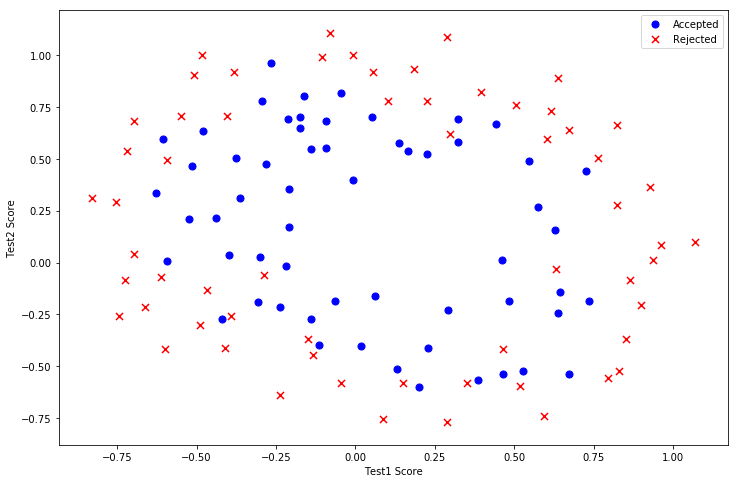

In [65]:
import matplotlib.pyplot as plt
% matplotlib inline
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'], positive['Test2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test1'], negative['Test2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test1 Score')
ax.set_ylabel('Test2 Score')


This data looks a bit more complicated than the previous example. In particular, you'll notice that there is no linear decision boundary that will perform well on this data i.e; we cannot seperate the data by straight line. 

One way to deal with this using a linear technique like logistic regression is to construct features that are derived from polynomials of the original features. 

We can try creating a bunch of polynomial features to feed into the classifier.

#### Feature Mapping
We are creating features from features Test1 and Test2 upto 6th degree. As a result our vector of two feature gets transformed into a 28 features. A logistic regression classfier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

While the feature mapping allows us to build a more expressive classfier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

In [66]:
# Using PolynomialFeatures from sklearn.preprocessing library 
# Generate a new feature matrix consisting of all polynomial combinations of the features with degree less 
# than or equal to the specified degree.

#from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(6)
# Those who designed the exercise decided that 6 was sufficient to demonstrate what they were interested in

X2 = poly.fit_transform(data2.iloc[:,0:2])
X2.shape

(118, 28)

PolynomialFeatures() inserts a column of 'ones' in the design matrix XX for the bias term 

In [67]:
y2 = data2.iloc[:, 2:3]
y2.head()

,Accepted
0,1
1,1
2,1
3,1
4,1


In [68]:
# Converting y dataframe to ndarray
y2 = y2.values
y2.shape

(118, 1)

In [69]:
import numpy as np
initial_theta2 = np.zeros(28)
print(initial_theta2.shape)

m2 = X2.shape[0]
print(m2)

(28,)
118


In [90]:
# Regularized cost function, We dont regularize bias term
def regcost(theta2, X2, y2, learningRate):
    z = np.dot(X2, theta2.reshape(-1,1))
    h = sigmoid(z)
    J = (-1/m2) * np.sum(y2*np.log(h) + (1-y2)*np.log(1-h)) + ((learningRate)/(2*m2)) * np.sum(np.power(theta2[1:],2))
    return J

In [91]:
cost = regcost(initial_theta2,X2,y2,0)
print('RegCost = ' + str(cost))

RegCost = 0.6931471805599454


In [110]:
# Regulartized gradient, We dont regularize bias term
def grad(theta2, X2, y2, learningRate):
    z = np.dot(X2,theta2.reshape(-1,1))
    h = sigmoid(z)
    error = h - y2
    gradient = (1/m2)  * np.dot(X2.T, error) + (learningRate/m2) * np.r_[[[0]], theta2[1:].reshape(-1,1)]
    # np.r_ does row-wise merging
    
    return gradient.flatten()

In [111]:
grad(initial_theta2,X2,y2,0)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [122]:
import scipy.optimize as opt
result = opt.fmin_cg(f = regcost, x0 = initial_theta2, fprime = grad, args = (X2,y2,1))
result

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 19
         Function evaluations: 55
         Gradient evaluations: 55


array([ 1.2726322 ,  0.62526851,  1.18110054, -2.01977776, -0.91750968,
       -1.43140105,  0.12396938, -0.36542089, -0.35720348, -0.17516017,
       -1.45817405, -0.05109747, -0.61556198, -0.2747374 , -1.19275643,
       -0.24225813, -0.20594332, -0.0447863 , -0.27777193, -0.29534672,
       -0.45647333, -1.04328679,  0.02771439, -0.29243876,  0.01551392,
       -0.3273817 , -0.14391016, -0.92473298])

In [123]:
def predict(theta2,X2):
    prob = sigmoid(np.dot(X2, theta2)) >= 0.5
    return (prob.astype('int'))

In [124]:
# Accuracy at lambda = 1
p = predict(result,X2)
accuracy = np.sum((p == y2.ravel()) / len(p)) * 100
print(accuracy)

83.05084745762711
